<a href="https://colab.research.google.com/github/waraporn19/Project_2021_matchingcolor/blob/main/Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/shadeimg'

In [4]:
import os

In [5]:
os.listdir(path)

['9-10 7 2021',
 'รูปฟัน07',
 '11 7 2021',
 'ฟันสักอย่างจำวันไม่ได้',
 '1 teeth .gsheet',
 '16 8 2021',
 '17 8 2021',
 '1 teeth .xlsx',
 '2 teeth .xlsx',
 '2 teeth.gsheet',
 'All shade',
 'A1set1.xlsx',
 'SVM shade',
 'BB1.xlsx',
 'CC1.xlsx',
 'DD1.xlsx',
 'AA1.xlsx',
 'Color-checkerAA1.xlsx',
 'Color-checkerBB.xlsx',
 'Color-checkerDD .xlsx',
 'Color-checkerCC.xlsx']

In [6]:
!pip install azure-storage-blob==2.1.0

     |████████████████████████████████| 88 kB 3.0 MB/s 
     |████████████████████████████████| 47 kB 3.9 MB/s 
     |████████████████████████████████| 3.6 MB 26.5 MB/s 


In [7]:
from azure.storage.blob import BlockBlobService
import os

In [8]:
blob_service_client = BlockBlobService(account_name='dent01', account_key='CuShY0B4TZJ84TjzPpaHxyrHOpO73aGXeCpdVq7x26OjIlQ1HOz+3DVc9pDEj9BdcEL8odFuTRF0mOAE+aCgiw==')

In [9]:
import cv2
from matplotlib import pyplot as plt #การเรียกใช้คำสั่ง matplotlib เพื่อวาดกราฟ โดยแทนชื่อ matplotlib ด้วย plt
import matplotlib

In [10]:
AA = os.path.join(path,'AA1.xlsx')

In [11]:
A1_set1= pd.read_excel(AA, sheet_name='A1Set1')
A1_set1

ชื่อไฟล์ข้อมูล  ...                   หมายเหตุ
0    1665B5AE-934F-4116-AE19-3369544A125F.png  ...  ค่า duration 1/90 ISO 171
1    47C127AF-8872-4A1E-9F72-082F72252B3F.png  ...  ค่า duration 1/90 ISO 171
2    15991304-7501-4377-BE6E-1B9AF5258FC1.png  ...  ค่า duration 1/90 ISO 171
3    5CE2CB9A-C765-4240-B3D3-E352B1581A1B.png  ...  ค่า duration 1/90 ISO 171
4    26A32C19-6890-4999-A7F2-D8399A56E3B5.png  ...  ค่า duration 1/90 ISO 171
..                                        ...  ...                        ...
155  A95B5685-7346-4585-AE3D-674F5539C891.png  ...  ค่า duration 1/90 ISO 171
156  548D8FC6-5993-476E-9F84-FEEE003BE798.png  ...  ค่า duration 1/90 ISO 171
157  761A1FDE-FD1C-4A18-8C5F-27608736CB3C.png  ...  ค่า duration 1/90 ISO 171
158  027B3600-F7AD-41B8-8DE5-1706B68BAE4F.png  ...  ค่า duration 1/90 ISO 171
159  57148CAB-1038-4B0D-9C2F-6DCB9632D2DF.png  ...  ค่า duration 1/90 ISO 171

[160 rows x 7 columns]

In [12]:
A1_set1.rename(columns={"ฝั่งซ้าย": "Ref"},inplace=True)

In [13]:
A1_set1.rename(columns={"ฝั่งขวา":"Shad"},inplace=True)

In [14]:
A1_set1.rename(columns={"ชื่อไฟล์ข้อมูล":"Img"},inplace=True)

In [15]:
A1_set1

Img  ...                   หมายเหตุ
0    1665B5AE-934F-4116-AE19-3369544A125F.png  ...  ค่า duration 1/90 ISO 171
1    47C127AF-8872-4A1E-9F72-082F72252B3F.png  ...  ค่า duration 1/90 ISO 171
2    15991304-7501-4377-BE6E-1B9AF5258FC1.png  ...  ค่า duration 1/90 ISO 171
3    5CE2CB9A-C765-4240-B3D3-E352B1581A1B.png  ...  ค่า duration 1/90 ISO 171
4    26A32C19-6890-4999-A7F2-D8399A56E3B5.png  ...  ค่า duration 1/90 ISO 171
..                                        ...  ...                        ...
155  A95B5685-7346-4585-AE3D-674F5539C891.png  ...  ค่า duration 1/90 ISO 171
156  548D8FC6-5993-476E-9F84-FEEE003BE798.png  ...  ค่า duration 1/90 ISO 171
157  761A1FDE-FD1C-4A18-8C5F-27608736CB3C.png  ...  ค่า duration 1/90 ISO 171
158  027B3600-F7AD-41B8-8DE5-1706B68BAE4F.png  ...  ค่า duration 1/90 ISO 171
159  57148CAB-1038-4B0D-9C2F-6DCB9632D2DF.png  ...  ค่า duration 1/90 ISO 171

[160 rows x 7 columns]

In [16]:
#A1_set1 = A1_set1.drop([0])
#A1_set1

In [17]:
table1= A1_set1[['Ref', 'Shad','Img']]
table1

Ref Shad                                       Img
0    A1   A1  1665B5AE-934F-4116-AE19-3369544A125F.png
1    A1   A1  47C127AF-8872-4A1E-9F72-082F72252B3F.png
2    A1   A1  15991304-7501-4377-BE6E-1B9AF5258FC1.png
3    A1   A1  5CE2CB9A-C765-4240-B3D3-E352B1581A1B.png
4    A1   A1  26A32C19-6890-4999-A7F2-D8399A56E3B5.png
..   ..  ...                                       ...
155  A1   D4  A95B5685-7346-4585-AE3D-674F5539C891.png
156  A1   D4  548D8FC6-5993-476E-9F84-FEEE003BE798.png
157  A1   D4  761A1FDE-FD1C-4A18-8C5F-27608736CB3C.png
158  A1   D4  027B3600-F7AD-41B8-8DE5-1706B68BAE4F.png
159  A1   D4  57148CAB-1038-4B0D-9C2F-6DCB9632D2DF.png

[160 rows x 3 columns]

In [18]:
A1_set11 =A1_set1.head(3)
A1_set11

Img  ...                   หมายเหตุ
0  1665B5AE-934F-4116-AE19-3369544A125F.png  ...  ค่า duration 1/90 ISO 171
1  47C127AF-8872-4A1E-9F72-082F72252B3F.png  ...  ค่า duration 1/90 ISO 171
2  15991304-7501-4377-BE6E-1B9AF5258FC1.png  ...  ค่า duration 1/90 ISO 171

[3 rows x 7 columns]

In [19]:
import numpy as np

In [81]:
list_total1 = list()
for img in A1_set11['Img']:
  S1_double = img
  full_path_to_file2 = os.path.join(S1_double) 
  blob_service_client.get_blob_to_path('shadeimg', full_path_to_file2, full_path_to_file2)
  imgS1_A1A1_1  = cv2.imread(S1_double) #RGB
  S1RGB_imgA1A1_1= cv2.cvtColor(imgS1_A1A1_1, cv2.COLOR_BGR2RGB)
  S1meanrefA1_1 = list()
  for i in range(S1RGB_imgA1A1_1.shape[0]): 
     for j in range(S1RGB_imgA1A1_1.shape[1]): 
                if 1769<i<1881 and 2019<j<2131 :
                  S1meanrefA1_1.append(S1RGB_imgA1A1_1[i][j]) 
  S1meanrefA1_1 = np.array(S1meanrefA1_1)
  S1rgbrefA1_1 = list()
  for i in range(3):
    S1rgbrefA1_1.append(S1meanrefA1_1[:,i].mean())
  list_total1.append(S1rgbrefA1_1)

In [82]:
list_total1

[[239.26191055920785, 226.7721775829884, 193.5400535670806],
 [238.4326759191624, 226.12490869247625, 192.41555068582096],
 [238.7831344858372, 226.52520087655222, 193.02548494440387]]

In [83]:
cols=['R-ref', 'G-ref' , 'B-ref']
S1=pd.DataFrame(list_total1,columns=cols)
S1['Setting']='Set1'
S1

R-ref       G-ref       B-ref Setting
0  239.261911  226.772178  193.540054    Set1
1  238.432676  226.124909  192.415551    Set1
2  238.783134  226.525201  193.025485    Set1

In [61]:
import cv2
from matplotlib import pyplot as plt #การเรียกใช้คำสั่ง matplotlib เพื่อวาดกราฟ โดยแทนชื่อ matplotlib ด้วย plt
import matplotlib
import numpy as np

In [ ]:
# den10= cv2.rectangle(RGB_img1,(2030,1800),(2135,1700),(255,0,0),10) 
# Square1 = cv2.rectangle(RGB_img1,(1710,1700),(1820,1800),(255,0,0),10)#(x,y)(x,y)
# plt.imshow(RGB_img1)

In [85]:
test1 = list()
for img in A1_set11['Img']:
  S1_double = img
  full_path_to_file2 = os.path.join(S1_double) 
  blob_service_client.get_blob_to_path('shadeimg', full_path_to_file2, full_path_to_file2)
  imgS1_A1A1_1  = cv2.imread(S1_double) #RGB
  S1RGB_imgA1A1_1= cv2.cvtColor(imgS1_A1A1_1, cv2.COLOR_BGR2RGB)
  for i in range(S1RGB_imgA1A1_1.shape[0]): #ให้ i รันตาม row หรือ shape[0] คือแถว มีทั้งหมด 4032 แถว ของภาพที่ปรับขนาดมาแล้ว
       for j in range(S1RGB_imgA1A1_1.shape[1]): #ให้ j รันตาม colum มีทั้งหมด 3024 colum เช่น แถวที่ 1 เข้ามาให้รันครบ 3024colum
                 if 1799<i<1801 and 2029<j<2031 :   #ถ้าค่า i ที่เข้ามาอยู่ระหว่าง 1849 - 2101   ค่า j  ที่เข้ามาอยู่ระหว่าง 1799-2001
                    print(S1RGB_imgA1A1_1[i][j])#ถ้าค่าอยู่ใน ij  จะให้แสดงค่าที่อยู่ตำแหน่งนั้นๆ

[237 221 185]
[238 224 187]
[238 223 184]


In [ ]:
[238 222 186]
[238 224 187]
[237 222 183]

#เช็คค่าสี

In [ ]:
# den10= cv2.rectangle(RGB_img1,(2030,1800),(2135,1700),(255,0,0),10) 
# Square1 = cv2.rectangle(RGB_img1,(1710,1700),(1820,1800),(255,0,0),10)#(x,y)(x,y)
# plt.imshow(RGB_img1)

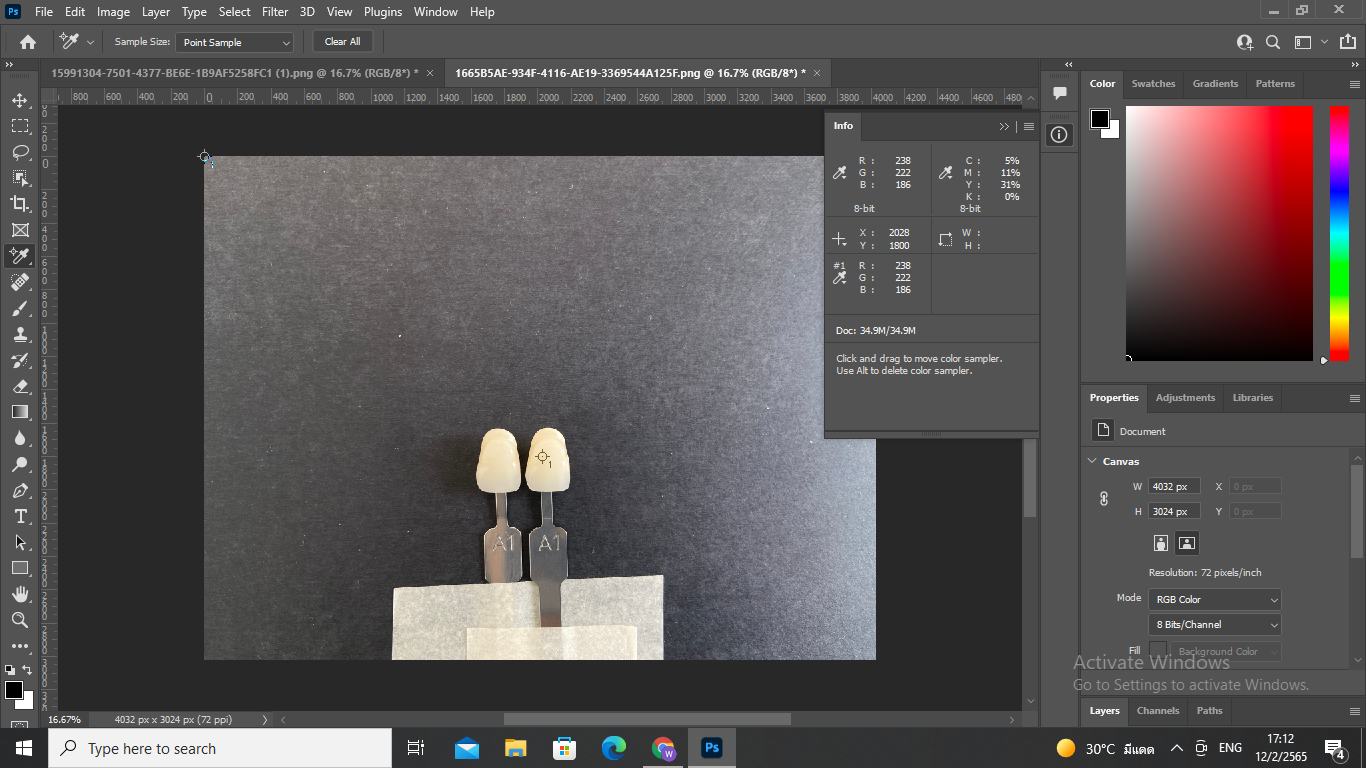

In [ ]:
[238 222 186]
[238 224 187]
[237 222 183]

In [60]:
test1 = list()
for img in A1_set11['Img']:
  S1_double = img
  full_path_to_file2 = os.path.join(S1_double) 
  blob_service_client.get_blob_to_path('shadeimg', full_path_to_file2, full_path_to_file2)
  imgS1_A1A1_1  = cv2.imread(S1_double) #RGB
  S1RGB_imgA1A1_1= cv2.cvtColor(imgS1_A1A1_1, cv2.COLOR_BGR2RGB)
  for i in range(S1RGB_imgA1A1_1.shape[0]): #ให้ i รันตาม row หรือ shape[0] คือแถว มีทั้งหมด 4032 แถว ของภาพที่ปรับขนาดมาแล้ว
       for j in range(S1RGB_imgA1A1_1.shape[1]): #ให้ j รันตาม colum มีทั้งหมด 3024 colum เช่น แถวที่ 1 เข้ามาให้รันครบ 3024colum
                 if 1799<i<1801 and 2027<j<2029 :   #ถ้าค่า i ที่เข้ามาอยู่ระหว่าง 1849 - 2101   ค่า j  ที่เข้ามาอยู่ระหว่าง 1799-2001
                    print(S1RGB_imgA1A1_1[i][j])#ถ้าค่าอยู่ใน ij  จะให้แสดงค่าที่อยู่ตำแหน่งนั้นๆ

[238 222 186]
[238 224 187]
[237 222 183]


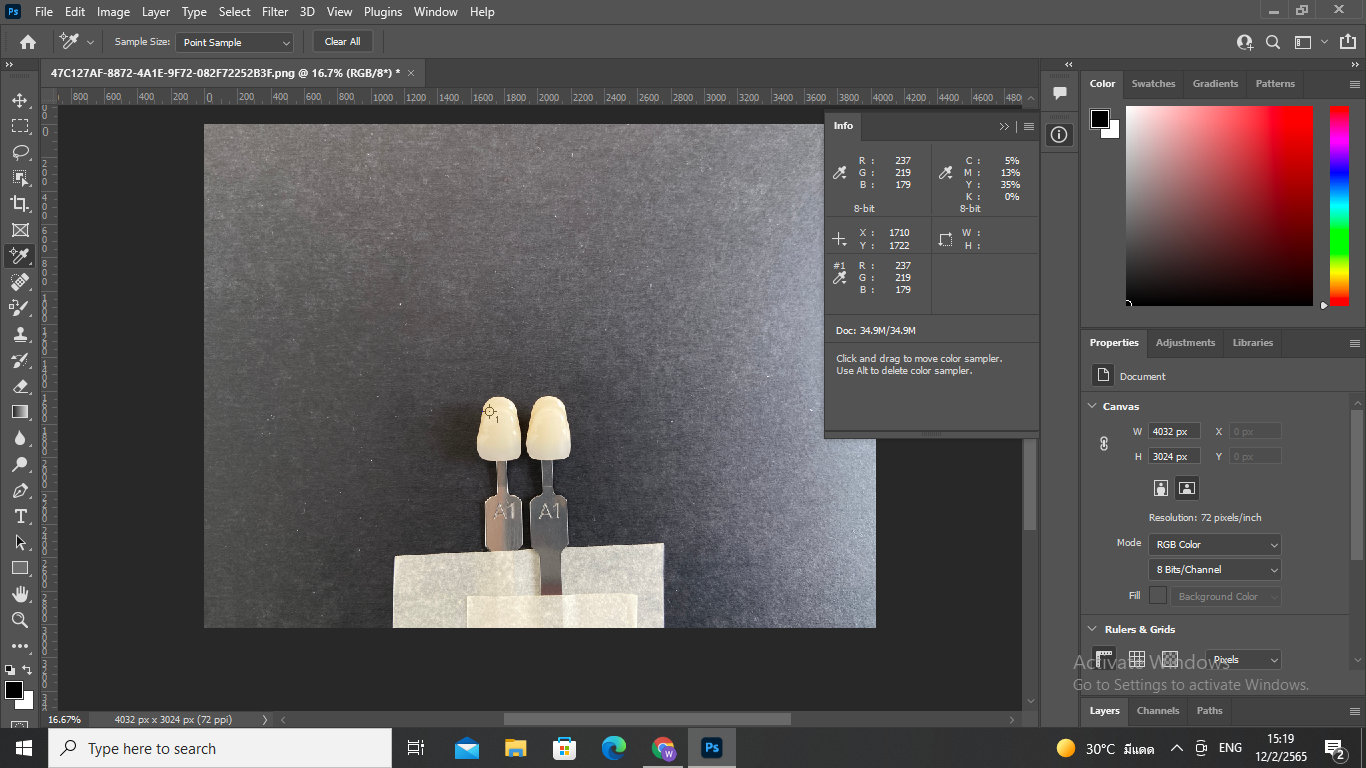

In [57]:
test = list()
for img in A1_set11['Img']:
  S1_double = img
  full_path_to_file2 = os.path.join(S1_double) 
  blob_service_client.get_blob_to_path('shadeimg', full_path_to_file2, full_path_to_file2)
  imgS1_A1A1_1  = cv2.imread(S1_double) #RGB
  S1RGB_imgA1A1_1= cv2.cvtColor(imgS1_A1A1_1, cv2.COLOR_BGR2RGB)
  for i in range(S1RGB_imgA1A1_1.shape[0]): #ให้ i รันตาม row หรือ shape[0] คือแถว มีทั้งหมด 4032 แถว ของภาพที่ปรับขนาดมาแล้ว
       for j in range(S1RGB_imgA1A1_1.shape[1]): #ให้ j รันตาม colum มีทั้งหมด 3024 colum เช่น แถวที่ 1 เข้ามาให้รันครบ 3024colum
                 if 1721<i<1723 and 1709<j<1711 :   #ถ้าค่า i ที่เข้ามาอยู่ระหว่าง 1849 - 2101   ค่า j  ที่เข้ามาอยู่ระหว่าง 1799-2001
                    print(S1RGB_imgA1A1_1[i][j])#ถ้าค่าอยู่ใน ij  จะให้แสดงค่าที่อยู่ตำแหน่งนั้นๆ

[238 223 184]
[237 219 179]
[239 224 185]


In [56]:
list_total1

[[240.58938003892132, 227.640441108331, 193.62237049393013],
 [240.08581225094986, 226.9383745714021, 193.06218144750255],
 [240.45222870910945, 227.37336669446762, 193.68427393198036]]

In [47]:
test = list()
for img in A1_set11['Img']:
  S1_double = img
  full_path_to_file2 = os.path.join(S1_double) 
  blob_service_client.get_blob_to_path('shadeimg', full_path_to_file2, full_path_to_file2)
  imgS1_A1A1_1  = cv2.imread(S1_double) #RGB
  S1RGB_imgA1A1_1= cv2.cvtColor(imgS1_A1A1_1, cv2.COLOR_BGR2RGB)
  for i in range(S1RGB_imgA1A1_1.shape[0]): #ให้ i รันตาม row หรือ shape[0] คือแถว มีทั้งหมด 4032 แถว ของภาพที่ปรับขนาดมาแล้ว
       for j in range(S1RGB_imgA1A1_1.shape[1]): #ให้ j รันตาม colum มีทั้งหมด 3024 colum เช่น แถวที่ 1 เข้ามาให้รันครบ 3024colum
                 if 1709<i<1711 and 1709<j<1711 :   #ถ้าค่า i ที่เข้ามาอยู่ระหว่าง 1849 - 2101   ค่า j  ที่เข้ามาอยู่ระหว่าง 1799-2001
                    print(S1RGB_imgA1A1_1[i][j])#ถ้าค่าอยู่ใน ij  จะให้แสดงค่าที่อยู่ตำแหน่งนั้นๆ

[234 217 174]
[236 217 175]
[233 216 173]


In [39]:
for i in range(S1RGB_imgA1A1_1.shape[0]): #ให้ i รันตาม row หรือ shape[0] คือแถว มีทั้งหมด 4032 แถว ของภาพที่ปรับขนาดมาแล้ว
     for j in range(S1RGB_imgA1A1_1.shape[1]): #ให้ j รันตาม colum มีทั้งหมด 3024 colum เช่น แถวที่ 1 เข้ามาให้รันครบ 3024colum
               if 1709<i<1711 and 1721<j<1723:    #ถ้าค่า i ที่เข้ามาอยู่ระหว่าง 1849 - 2101   ค่า j  ที่เข้ามาอยู่ระหว่าง 1799-2001
                    print(S1RGB_imgA1A1_1[i][j])#ถ้าค่าอยู่ใน ij  จะให้แสดงค่าที่อยู่ตำแหน่งนั้นๆ

[238 223 182]


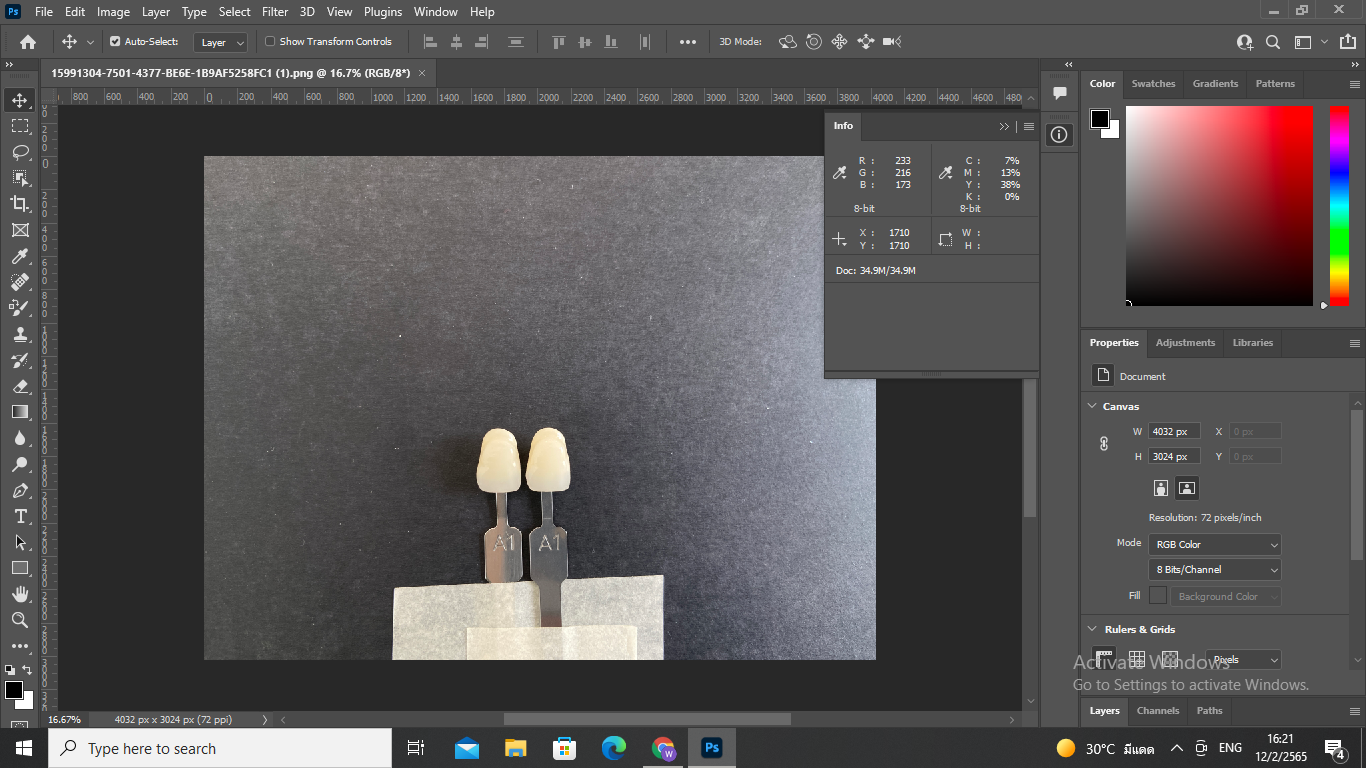

In [46]:
for i in range(S1RGB_imgA1A1_1.shape[0]): #ให้ i รันตาม row หรือ shape[0] คือแถว มีทั้งหมด 4032 แถว ของภาพที่ปรับขนาดมาแล้ว
     for j in range(S1RGB_imgA1A1_1.shape[1]): #ให้ j รันตาม colum มีทั้งหมด 3024 colum เช่น แถวที่ 1 เข้ามาให้รันครบ 3024colum
               if 1709<i<1711 and 1709<j<1711:    #ถ้าค่า i ที่เข้ามาอยู่ระหว่าง 1849 - 2101   ค่า j  ที่เข้ามาอยู่ระหว่าง 1799-2001
                    print(S1RGB_imgA1A1_1[i][j])#ถ้าค่าอยู่ใน ij  จะให้แสดงค่าที่อยู่ตำแหน่งนั้นๆ

[233 216 173]


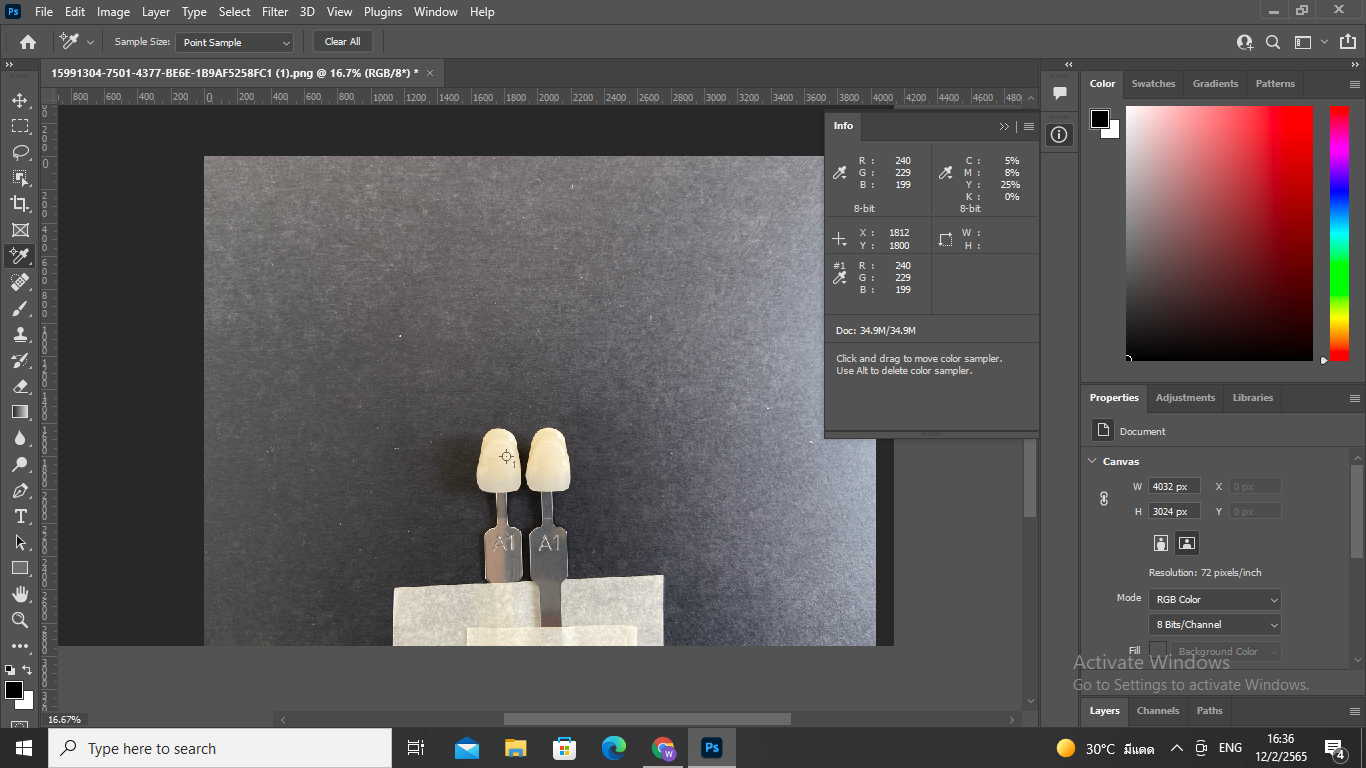

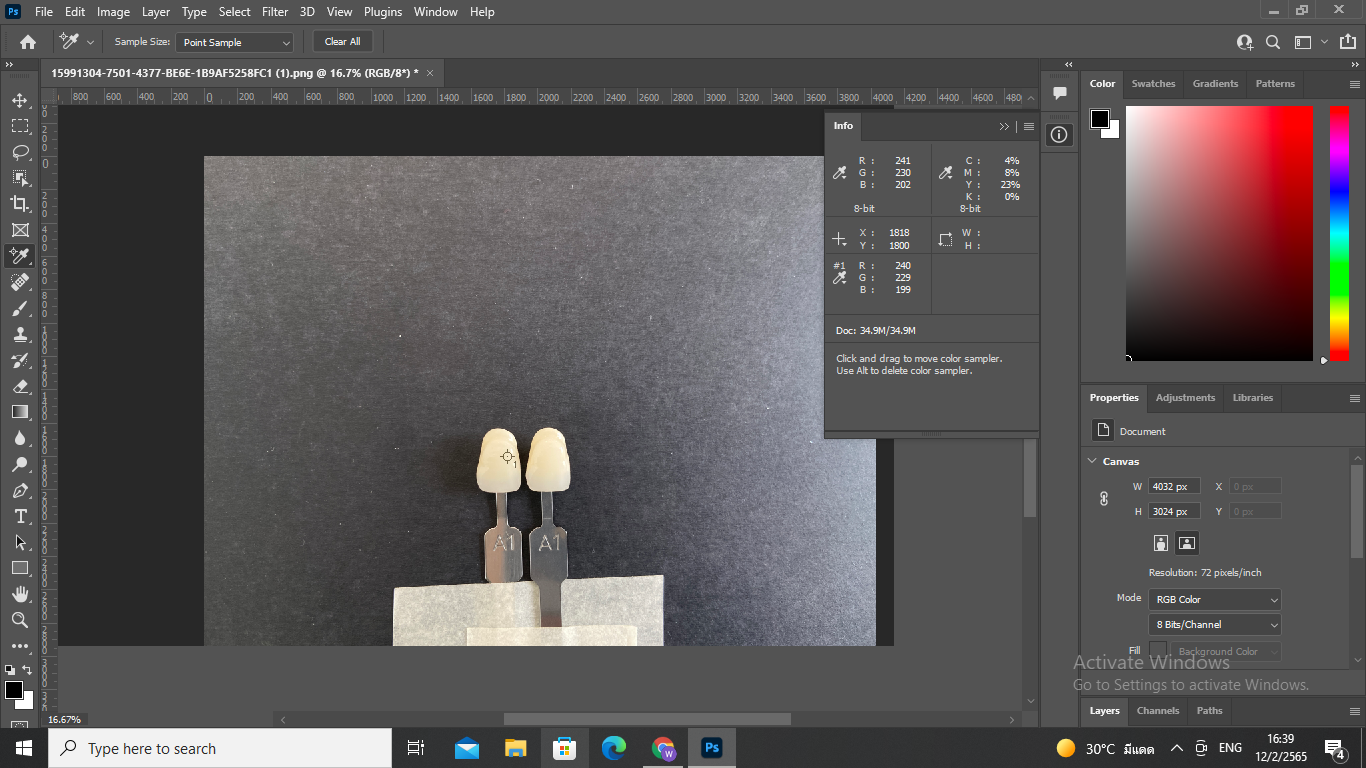

In [52]:
for i in range(S1RGB_imgA1A1_1.shape[0]): #ให้ i รันตาม row หรือ shape[0] คือแถว มีทั้งหมด 3024 แถว ของภาพที่ปรับขนาดมาแล้ว
     for j in range(S1RGB_imgA1A1_1.shape[1]): #ให้ j รันตาม colum มีทั้งหมด 4032 colum เช่น แถวที่ 1 เข้ามาให้รันครบ 3024colum
               if 1799<i<1801 and 1817<j<1819:    #ถ้าค่า i ที่เข้ามาอยู่ระหว่าง 1849 - 2101   ค่า j  ที่เข้ามาอยู่ระหว่าง 1799-2001
                    print(S1RGB_imgA1A1_1[i][j])#ถ้าค่าอยู่ใน ij  จะให้แสดงค่าที่อยู่ตำแหน่งนั้นๆ

[241 230 202]


In [54]:
test2 = list()
for img in A1_set11['Img']:
  S1_double = img
  full_path_to_file2 = os.path.join(S1_double) 
  blob_service_client.get_blob_to_path('shadeimg', full_path_to_file2, full_path_to_file2)
  imgS1_A1A1_1  = cv2.imread(S1_double) #RGB
  S1RGB_imgA1A1_1= cv2.cvtColor(imgS1_A1A1_1, cv2.COLOR_BGR2RGB)
  for i in range(S1RGB_imgA1A1_1.shape[0]): #ให้ i รันตาม row หรือ shape[0] คือแถว มีทั้งหมด 4032 แถว ของภาพที่ปรับขนาดมาแล้ว
       for j in range(S1RGB_imgA1A1_1.shape[1]): #ให้ j รันตาม colum มีทั้งหมด 3024 colum เช่น แถวที่ 1 เข้ามาให้รันครบ 3024colum
                  if 1799<i<1801 and 1817<j<1819:    #ถ้าค่า i ที่เข้ามาอยู่ระหว่าง 1849 - 2101   ค่า j  ที่เข้ามาอยู่ระหว่าง 1799-2001
                    print(S1RGB_imgA1A1_1[i][j])#ถ้าค่าอยู่ใน ij  จะให้แสดงค่าที่อยู่ตำแหน่งนั้นๆ

[243 232 202]
[241 230 202]
[241 230 202]


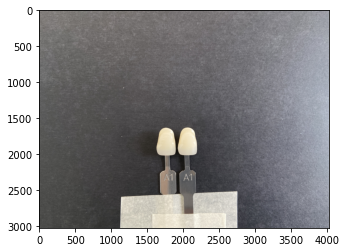

In [58]:
img  = cv2.imread(S1_double)
RGB_img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [59]:
RGB_img.shape

(3024, 4032, 3)